In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load demand file, add datetime column, resample to 1H frequency and convert to GAMS format

In [50]:
demand = pd.read_csv('Total Load - Day Ahead _ Actual_201901010000-202001010000-2.csv', keep_default_na=True)
demand['datetime'] = pd.date_range(start='2019-01-01 00:00:00', end='2020-01-01 00:45:00', freq='15min')
demand = demand[['datetime', 'Actual Total Load [MW] - Germany (DE)']].set_index('datetime')
demand = demand.resample('H').mean()
demand = demand[:-1]
demand['hour'] = np.arange(1,8761)
demand['hour'] = 'h' + demand['hour'].astype(str)
demand = demand[['hour', 'Actual Total Load [MW] - Germany (DE)']]
demand

,hour,Actual Total Load [MW] - Germany (DE)
datetime,,
2019-01-01 00:00:00,h1,43012.75
2019-01-01 01:00:00,h2,41460.75
2019-01-01 02:00:00,h3,39921.75
2019-01-01 03:00:00,h4,39099.50
2019-01-01 04:00:00,h5,38886.25
...,...,...
2019-12-31 19:00:00,h8756,54203.75
2019-12-31 20:00:00,h8757,51567.50
2019-12-31 21:00:00,h8758,48591.50


495490360.5


<AxesSubplot:xlabel='datetime'>

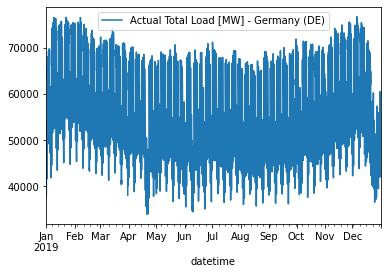

In [52]:
print(demand['Actual Total Load [MW] - Germany (DE)'].sum())
demand.plot(y = 'Actual Total Load [MW] - Germany (DE)')

### Save file in tsv format

In [14]:
demand.to_csv('Germany_demand_2019.tsv',sep='\t', header=False, index=False)

### Alternative demand: Multiply with the fraction of energy mix that is going to be phased out
- Demand is then the new capacity required in order to replace the existing
- Coal and Nuclear make up 0.365 of the demand, so that will be the scaling factor

Text(0, 0.5, 'MW')

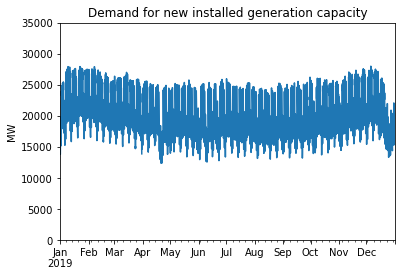

In [71]:
demand_alt = demand.copy()
demand_alt['Actual Total Load [MW] - Germany (DE)'] = demand_alt['Actual Total Load [MW] - Germany (DE)']*0.365
demand_alt.plot(y="Actual Total Load [MW] - Germany (DE)", title="Demand for new installed generation capacity", legend=False)
plt.ylim(0,35000)
plt.xlabel("")
plt.ylabel("MW")

In [72]:
demand_alt.to_csv('Germany_altdemand_2019.tsv',sep='\t', header=False, index=False)

## Load Wind capacity factor file and parse dates, filter 2019 values, convert to GAMS format

In [65]:
cap_factors = pd.read_csv('ninja_wind_country_DE_current-merra-2_corrected.csv', header=2, parse_dates=['time'])
filt = (cap_factors['time'] >= '2019')
cap_factors = cap_factors.loc[filt].reset_index()
cap_factors['newind'] = cap_factors.index + 1
cap_factors['hour'] = 'h' + cap_factors['newind'].astype(str) + '.wind'
cap_factors = cap_factors[['hour', 'national']]
cap_factors

,hour,national
0,h1.wind,0.4643
1,h2.wind,0.5103
2,h3.wind,0.5599
3,h4.wind,0.5934
4,h5.wind,0.6385
...,...,...
8755,h8756.wind,0.1071
8756,h8757.wind,0.0889
8757,h8758.wind,0.0774
8758,h8759.wind,0.0680


<AxesSubplot:>

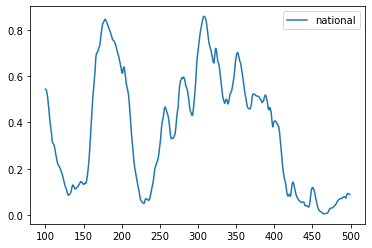

In [67]:
cap_factors[100:500].plot(y='national')

In [16]:
cap_factors.to_csv('wind_cf_2019.tsv', sep='\t', header=False,index=False)

### Same procedure for solar pv capacity factors

In [69]:
cap_factors = pd.read_csv('ninja_pv_country_DE_merra-2_corrected.csv', header=2, parse_dates=['time'])
filt = (cap_factors['time'] >= '2019')
cap_factors = cap_factors.loc[filt].reset_index()
cap_factors['newind'] = cap_factors.index + 1
cap_factors['hour'] = 'h' + cap_factors['newind'].astype(str) + '.pv'
cap_factors = cap_factors[['hour', 'national']]
cap_factors

,hour,national
0,h1.pv,0.0
1,h2.pv,0.0
2,h3.pv,0.0
3,h4.pv,0.0
4,h5.pv,0.0
...,...,...
8755,h8756.pv,0.0
8756,h8757.pv,0.0
8757,h8758.pv,0.0
8758,h8759.pv,0.0


<AxesSubplot:>

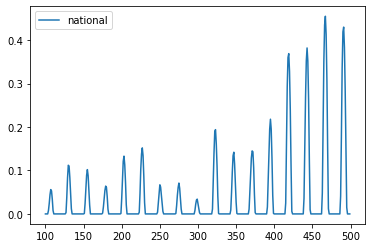

In [70]:
cap_factors[100:500].plot(y='national')

In [18]:
cap_factors.to_csv('solarpv_cf_2019.tsv', sep='\t', header=False,index=False)

### Make gas and coal capacity factors (just 1)

In [19]:
gas_cf = pd.DataFrame()
gas_cf['hour'] = np.arange(1,8761)
gas_cf['hour'] = 'h' + gas_cf['hour'].astype(str) + '.gas'
gas_cf['capacity factor'] = 1.0
display(gas_cf)
gas_cf.to_csv('gas_cf_2019.tsv', sep='\t', header=False,index=False)

,hour,capacity factor
0,h1.gas,1.0
1,h2.gas,1.0
2,h3.gas,1.0
3,h4.gas,1.0
4,h5.gas,1.0
...,...,...
8755,h8756.gas,1.0
8756,h8757.gas,1.0
8757,h8758.gas,1.0
8758,h8759.gas,1.0


In [20]:
gas_ccs_cf = pd.DataFrame()
gas_ccs_cf['hour'] = np.arange(1,8761)
gas_ccs_cf['hour'] = 'h' + gas_ccs_cf['hour'].astype(str) + '.gas_ccs'
gas_ccs_cf['capacity factor'] = 1.0
display(gas_ccs_cf)
gas_ccs_cf.to_csv('gas_ccs_cf_2019.tsv', sep='\t', header=False,index=False)

,hour,capacity factor
0,h1.gas_ccs,1.0
1,h2.gas_ccs,1.0
2,h3.gas_ccs,1.0
3,h4.gas_ccs,1.0
4,h5.gas_ccs,1.0
...,...,...
8755,h8756.gas_ccs,1.0
8756,h8757.gas_ccs,1.0
8757,h8758.gas_ccs,1.0
8758,h8759.gas_ccs,1.0
